<a href="https://colab.research.google.com/github/lukakukhaleishvili/davaleba-6/blob/main/davaleba6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
def explanation():
    print("""
ყურადღება (Attention) საშუალებას აძლევს მოდელს, ყურადღება გაამახვილოს შეყვანის სხვადასხვა ნაწილზე.
მაგალითად, თარგმნისას სიტყვა "bank" შეიძლება ნიშნავდეს "მდინარის ნაპირს" ან "ბანკს" — ყურადღება განსაზღვრავს, რომელი მნიშვნელობაა რელევანტური კონტექსტში.

კომპონენტები:
- Query (Q): ის, რაც ყურადღებას ითხოვს
- Key (K): ის, რასაც ვადარებთ
- Value (V): შესაბამისი ინფორმაცია

Attention(Q, K, V) = softmax(QKᵀ / √d_k) · V

Q, K, V ჩვეულებრივ წარმოიქმნება იმავე შეყვანიდან (Self-Attention).
    """)

In [3]:
#  მატრიცული ნამრავლის დემონსტრაცია
def demonstrate_matrix_multiplication():
    Q = np.array([[1, 0]])
    K = np.array([[1, 0], [0, 1]])
    V = np.array([[10, 0], [0, 5]])

    scores = Q @ K.T
    weights = softmax(scores)
    output = weights @ V

    print("Q @ Kᵀ =", scores)
    print("softmax(QKᵀ) =", weights)
    print("Attention Output =", output)

def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=-1, keepdims=True)

In [4]:
# ვიზუალიზაცია Attention ქულების
def attention_heatmap():
    tokens = ['მე', 'ვწერ', 'კოდს']
    attention = np.array([
        [0.6, 0.3, 0.1],
        [0.2, 0.7, 0.1],
        [0.1, 0.3, 0.6]
    ])

    plt.figure(figsize=(6, 4))
    sns.heatmap(attention, xticklabels=tokens, yticklabels=tokens, cmap='Blues', annot=True)
    plt.title('Self-Attention Heatmap')
    plt.xlabel('Key')
    plt.ylabel('Query')
    plt.tight_layout()
    plt.show()

In [5]:
# მრავალთავიანი ყურადღება (Multi-Head Attention)
def explain_multihead():
    print("""
მრავალთავიანი ყურადღება (Multi-head Attention):

რამდენიმე დამოუკიდებელი ყურადღების თავი ერთდროულად აანალიზებს სხვადასხვა ნაწილს შეყვანაში.
დადებითი მხარეები:
- სხვადასხვა ურთიერთობების აღქმა
- უკეთესი ზოგადობა

პროცესი:
1. Q, K, V ში გადაკეთება მრავალი თავით (მაგ. 8)
2. დამოუკიდებელი Attention გათვლები
3. შედეგების შეერთიანება და პროექტირება უკან
    """)

In [6]:
# ნიღბიანი ყურადღება (Masked Attention)
def explain_masked():
    print("""
ნიღბიანი ყურადღება გამოიყენება დეკოდერში ტრანსფორმერებში.

მიზანია მომავალი ტოკენების ინფორმაციის "დამალვა", რათა მოდელმა წინასწარ არ "იცოდეს" პასუხი.

მიმდინარე პოზიციიდან მარჯვნივ მდგომ ყველა მნიშვნელობას ვანულებთ (ან ვანიჭებთ -∞)
    """)
    mask_example = np.triu(np.ones((4, 4)) * -np.inf, k=1)
    print("Masked Attention Matrix:\n", mask_example)


ყურადღება (Attention) საშუალებას აძლევს მოდელს, ყურადღება გაამახვილოს შეყვანის სხვადასხვა ნაწილზე. 
მაგალითად, თარგმნისას სიტყვა "bank" შეიძლება ნიშნავდეს "მდინარის ნაპირს" ან "ბანკს" — ყურადღება განსაზღვრავს, რომელი მნიშვნელობაა რელევანტური კონტექსტში.

კომპონენტები:
- Query (Q): ის, რაც ყურადღებას ითხოვს
- Key (K): ის, რასაც ვადარებთ
- Value (V): შესაბამისი ინფორმაცია

Attention(Q, K, V) = softmax(QKᵀ / √d_k) · V

Q, K, V ჩვეულებრივ წარმოიქმნება იმავე შეყვანიდან (Self-Attention).
    
Q @ Kᵀ = [[1 0]]
softmax(QKᵀ) = [[0.73105858 0.26894142]]
Attention Output = [[7.31058579 1.34470711]]


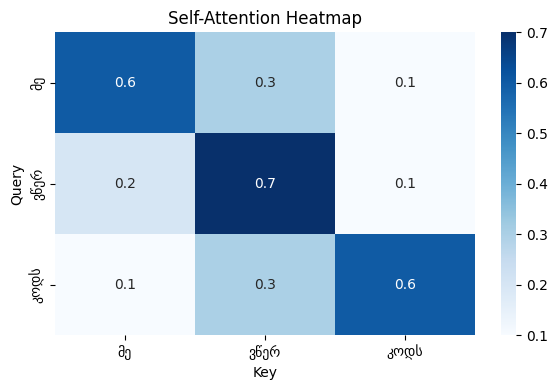


მრავალთავიანი ყურადღება (Multi-head Attention):

რამდენიმე დამოუკიდებელი ყურადღების თავი ერთდროულად აანალიზებს სხვადასხვა ნაწილს შეყვანაში.
დადებითი მხარეები:
- სხვადასხვა ურთიერთობების აღქმა
- უკეთესი ზოგადობა

პროცესი:
1. Q, K, V ში გადაკეთება მრავალი თავით (მაგ. 8)
2. დამოუკიდებელი Attention გათვლები
3. შედეგების შეერთიანება და პროექტირება უკან
    

ნიღბიანი ყურადღება გამოიყენება დეკოდერში ტრანსფორმერებში.

მიზანია მომავალი ტოკენების ინფორმაციის "დამალვა", რათა მოდელმა წინასწარ არ "იცოდეს" პასუხი.

მიმდინარე პოზიციიდან მარჯვნივ მდგომ ყველა მნიშვნელობას ვანულებთ (ან ვანიჭებთ -∞)
    
Masked Attention Matrix:
 [[  0. -inf -inf -inf]
 [  0.   0. -inf -inf]
 [  0.   0.   0. -inf]
 [  0.   0.   0.   0.]]


In [7]:
if __name__ == "__main__":
    explanation()
    demonstrate_matrix_multiplication()
    attention_heatmap()
    explain_multihead()
    explain_masked()
